**POSTTEST 2**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Tampilkan rata-rata, standar deviasi, nilai minimum, nilai maksimum, Q1, Q2, dan Q3 dari attribute bertipe angka.
df = pd.read_csv("weather_classification_data.csv")
df_desc = df.describe(percentiles=[0.25, 0.5, 0.75]).T
print(df_desc)

                        count         mean        std     min    25%      50%  \
Temperature           13200.0    19.127576  17.386327  -25.00    4.0    21.00   
Humidity              13200.0    68.710833  20.194248   20.00   57.0    70.00   
Wind Speed            13200.0     9.832197   6.908704    0.00    5.0     9.00   
Precipitation (%)     13200.0    53.644394  31.946541    0.00   19.0    58.00   
Atmospheric Pressure  13200.0  1005.827896  37.199589  800.12  994.8  1007.65   
UV Index              13200.0     4.005758   3.856600    0.00    1.0     3.00   
Visibility (km)       13200.0     5.462917   3.371499    0.00    3.0     5.00   

                            75%      max  
Temperature             31.0000   109.00  
Humidity                84.0000   109.00  
Wind Speed              13.5000    48.50  
Precipitation (%)       82.0000   109.00  
Atmospheric Pressure  1016.7725  1199.21  
UV Index                 7.0000    14.00  
Visibility (km)          7.5000    20.00  


Data ini merepresentasikan kondisi cuaca dengan variasi cukup besar, namun ada beberapa nilai tidak realistis (temperature 109°C, humidity > 100%, precipitation > 100%, dan atmospheric pressure yang memiliki nilai ekstrim di 1.199 hPa meskipun memiliki rentang yang wajar di 994.8 – 1016.8 hPa ). Hal ini perlu diperiksa lebih lanjut sebagai outlier atau kesalahan input.

In [ ]:
# Tampilkan 10 record pertama dari dataset dengan attribute bertipe angka.
df_numerik = df.select_dtypes(include=["number"])
print(df_numerik.head(10))

   Temperature  Humidity  Wind Speed  Precipitation (%)  Atmospheric Pressure  \
0         14.0        73         9.5               82.0               1010.82   
1         39.0        96         8.5               71.0               1011.43   
2         30.0        64         7.0               16.0               1018.72   
3         38.0        83         1.5               82.0               1026.25   
4         27.0        74        17.0               66.0                990.67   
5         32.0        55         3.5               26.0               1010.03   
6         -2.0        97         8.0               86.0                990.87   
7          3.0        85         6.0               96.0                984.46   
8          3.0        83         6.0               66.0                999.44   
9         28.0        74         8.5              107.0               1012.13   

   UV Index  Visibility (km)  
0         2              3.5  
1         7             10.0  
2         5    

Sepuluh record pertama menunjukkan data numerik seperti Temperature, Humidity, Wind Speed, Precipitation (%), Atmospheric Pressure, UV Index, Visibility (km).

In [ ]:
# Tampilkan informasi jumlah record, jumlah attribute, nama attribute, jumlah attribute dengan tipe angka.

jmlh_record = df.shape[0]
jmlh_attribut = df.shape[1]
nama_attribut = df.columns.tolist()
jmlh_attribut_num = df_numerik.shape[1]

print("Jumlah record:", jmlh_record)
print("Jumlah attribute:", jmlh_attribut)
print("Nama attribute:", nama_attribut)
print("Jumlah attribute numerik:", jmlh_attribut_num)

Jumlah record: 13200
Jumlah attribute: 11
Nama attribute: ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season', 'Visibility (km)', 'Location', 'Weather Type']
Jumlah attribute numerik: 7


Dataset memiliki 13.200 record, 11 attribut, 7 attribut numerik, dan nama-nama attribut seperti Temperature, Humidity, Wind Speed, Precipitation (%), Cloud Cover, Atmospheric Pressure, UV Index, Season, Visibility (km), Location, dan Weather Type

In [ ]:
# Tampilkan jumlah label dari semua attribute yang bernilai object (contoh : Jenis Kelamin, Agama).

print(df["Cloud Cover"].value_counts())
print(df["Season"].value_counts())
print(df["Location"].value_counts())
print(df["Weather Type"].value_counts())

Cloud Cover
overcast         6090
partly cloudy    4560
clear            2139
cloudy            411
Name: count, dtype: int64
Season
Winter    5610
Spring    2598
Autumn    2500
Summer    2492
Name: count, dtype: int64
Location
inland      4816
mountain    4813
coastal     3571
Name: count, dtype: int64
Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64


Dapat dilihat bahwa:
*   'Cloud Cover' memiliki 4 label (overcast, partly  cloudy, clear, cloudy)
*   'Season' memiliki 4 label (winter, spring, autumn, summer)
*   'Location' memiliki 3 label (inland, mountain, coastal)
*   'Weather Type' memiliki 4 label (rainy, cloudy, sunny, snowy)



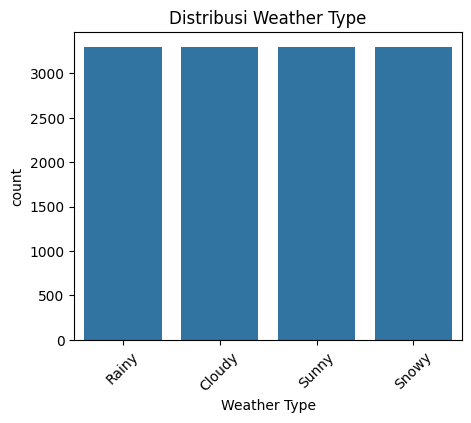

In [ ]:
# Visualisasikan dataset dengan salah satu grafik. Pilih grafik yang paling cocok untuk memvisualisasikan data tersebut.

plt.figure(figsize=(5,4))
sns.countplot(data=df, x="Weather Type", order=df["Weather Type"].value_counts().index)
plt.title("Distribusi Weather Type")
plt.xticks(rotation=45)
plt.show()

Berdasarkan gambar grafik diatas, terdapat empat kategori cuaca utama dalam dataset, yaitu Rainy, Cloudy, Sunny, dan Snowy, dengan jumlah kemunculan yang relatif seimbang, masing-masing sekitar 3.300 kali. Hal ini menunjukkan bahwa tidak ada satu jenis cuaca yang terlalu dominan sehingga data cuaca yang digunakan cukup terdistribusi merata dan representatif untuk analisis lebih lanjut.

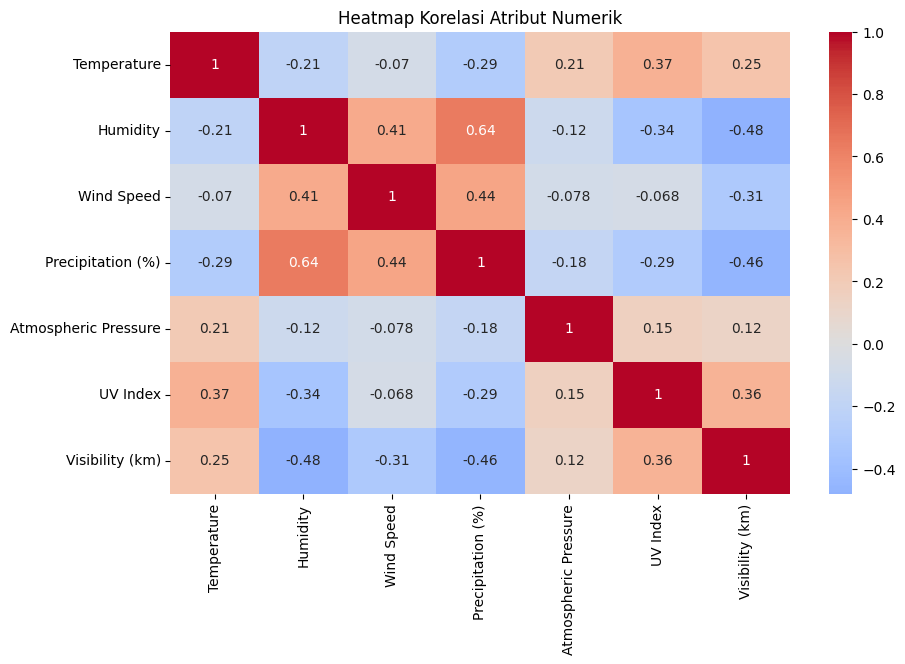

In [ ]:
# Tampilkan korelasi dataset menggunakan heatmap
plt.figure(figsize=(10,6))
corr_matrix = df_numerik.corr()
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, center=0)
plt.title("Heatmap Korelasi Atribut Numerik")
plt.show()

Berdasarkan heatmap korelasi, dapat disimpulkan bahwa hubungan paling kuat terlihat pada humidity dan precipitation yang berkorelasi positif tinggi, artinya semakin lembab udara maka semakin besar kemungkinan hujan. Sebaliknya, humidity berkorelasi negatif dengan visibility, menunjukkan bahwa humidity tinggi cenderung mengurangi jarak pandang. Wind speed juga memiliki hubungan sedang dengan humidity dan precipitation, sedangkan UV index lebih tinggi saat suhu naik dan kondisi cerah (korelasi positif dengan temperature dan visibility, negatif dengan humidity dan precipitation). Sementara itu, atmospheric pressure tidak menunjukkan hubungan yang signifikan dengan variabel lain sehingga cenderung independen.